# Cell 1 - imports and setup

In [369]:
# Cell 1 - imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Environment setup complete")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Environment setup complete
Pandas version: 2.2.3
NumPy version: 2.2.2


# Cell 2 - load and examine data

In [370]:
# Cell 2 - load and examine data
df = pd.read_csv("data/bank_transactions_data_2.csv")

print(f"Dataset loaded: {df.shape[0]} transactions, {df.shape[1]} features")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()

Dataset loaded: 2512 transactions, 16 features

Column names: ['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']

First few rows:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# Cell 3 - comprehensive data quality assessment using EDA pipeline

In [371]:
# Cell 3 - comprehensive data quality assessment using EDA pipeline
from fraud_eda_pipeline import FraudEDACapstone

print("Initializing comprehensive EDA pipeline")
print("=" * 40)

# Initialize EDA pipeline with raw dataset
eda_pipeline = FraudEDACapstone(df)

# Run comprehensive data quality assessment
print("\nRunning comprehensive data quality assessment on raw data...")
cleaned_df = eda_pipeline.comprehensive_data_quality_assessment()

print(f"\nData quality assessment completed")
print(f"Dataset shape after cleaning: {cleaned_df.shape}")

# Update our working dataframe
df = cleaned_df.copy()

Initializing comprehensive EDA pipeline
FraudEDACapstone initialized with dataset: (2512, 16)
Detected 4 numerical, 10 categorical, 2 date columns

Running comprehensive data quality assessment on raw data...
COMPREHENSIVE DATA QUALITY ASSESSMENT
Using existing data_quality_assessment.py module
Running data quality assessment
Missing values analysis

1. Explicit missing values:
-------------------------
Missing values by column:
  ✓ No explicit missing values found

2. Implicit missing values:
-------------------------
Patterns found:
  ✓ No suspicious patterns found

3. Invalid values:
---------------
Issues found:
  ✓ No invalid values detected

4. Overall data completeness:
------------------------------
Dataset dimensions: 2512 rows × 16 columns
Total cells: 40,192
Missing cells: 0
Data completeness: 100.00%
✓ Dataset has excellent completeness

Duplicate detection and cleanup

1. Exact duplicates:
--------------------
Exact duplicate rows: 0
✓ No exact duplicates found

2. Busines

# Cell 4 - detailed categorical analysis

In [372]:
# Cell 4 - detailed categorical analysis
print("Detailed categorical analysis")
print("=" * 28)

# Run categorical analysis from pipeline
categorical_summary = eda_pipeline.detailed_categorical_analysis()

print(f"\nCategorical analysis completed:")
for feature, summary in categorical_summary.items():
    dominant_pct = summary['top_percentage']
    balance_status = "highly skewed" if dominant_pct > 70 else "moderately skewed" if dominant_pct > 50 else "well balanced"
    print(f"  {feature}: {summary['unique_count']} categories, {balance_status} ({dominant_pct:.1f}% dominant)")

# Update dataframe from pipeline
df = eda_pipeline.get_cleaned_dataset()
print(f"\nDataset shape after categorical analysis: {df.shape}")

Detailed categorical analysis

DETAILED CATEGORICAL FEATURES ANALYSIS

TransactionID:
  Unique values: 2512
  Most common values:
    TX002496: 1 (0.04%)
    TX002495: 1 (0.04%)
    TX002494: 1 (0.04%)
    TX002493: 1 (0.04%)
    TX002492: 1 (0.04%)
    ... and 2507 other values

AccountID:
  Unique values: 495
  Most common values:
    AC00460: 12 (0.48%)
    AC00202: 12 (0.48%)
    AC00362: 12 (0.48%)
    AC00363: 12 (0.48%)
    AC00480: 11 (0.44%)
    ... and 490 other values

TransactionType:
  Unique values: 2
  Most common values:
    Debit: 1944 (77.39%)
    Credit: 568 (22.61%)

Location:
  Unique values: 43
  Most common values:
    Fort Worth: 70 (2.79%)
    Los Angeles: 69 (2.75%)
    Oklahoma City: 68 (2.71%)
    Charlotte: 68 (2.71%)
    Philadelphia: 67 (2.67%)
    ... and 38 other values

DeviceID:
  Unique values: 681
  Most common values:
    D000548: 9 (0.36%)
    D000142: 9 (0.36%)
    D000451: 9 (0.36%)
    D000697: 9 (0.36%)
    D000203: 9 (0.36%)
    ... and 676 o

# Cell 5 - outlier detection analysis

In [373]:
# Cell 5 - outlier detection analysis
print("Multi-method outlier detection analysis")
print("=" * 37)

# Run comprehensive outlier detection
outlier_methods = eda_pipeline.outlier_detection_analysis()

print(f"\nOutlier detection summary:")
for method, method_data in outlier_methods.items():
    total_outliers = sum([data['count'] for data in method_data.values()])
    print(f"  {method}: {total_outliers} total outliers detected")

print(f"\nOutlier flags added to dataset:")
print(f"  is_outlier: High-confidence outliers (≥2 methods)")
print(f"  outlier_score: Total outlier score per transaction")

# Update dataframe from pipeline
df = eda_pipeline.get_cleaned_dataset()
print(f"\nDataset now includes outlier analysis: {df.shape}")

Multi-method outlier detection analysis

OUTLIER DETECTION ANALYSIS
1. IQR Method:
---------------
  TransactionAmount: 113 outliers (4.50%)
  CustomerAge: 0 outliers (0.00%)
  TransactionDuration: 0 outliers (0.00%)
  AccountBalance: 0 outliers (0.00%)

2. Z-Score Method:
------------------
  TransactionAmount: 48 outliers (1.91%)
  CustomerAge: 0 outliers (0.00%)
  TransactionDuration: 0 outliers (0.00%)
  AccountBalance: 0 outliers (0.00%)

3. Consensus Outlier Scoring:
------------------------------
High-confidence outliers (≥2 methods): 48 (1.91%)
✓ Outlier detection completed

Outlier detection summary:
  IQR: 113 total outliers detected
  Z_Score: 48 total outliers detected

Outlier flags added to dataset:
  is_outlier: High-confidence outliers (≥2 methods)
  outlier_score: Total outlier score per transaction

Dataset now includes outlier analysis: (2512, 18)


# Cell 6 - multivariate analysis

In [374]:
# Cell 6 - multivariate analysis
print("Comprehensive multivariate analysis")
print("=" * 35)

# Run multivariate analysis
eda_pipeline.multivariate_analysis()

print(f"\nMultivariate analysis results:")

if hasattr(eda_pipeline, 'strong_correlations'):
    print(f"  Strong correlations found: {len(eda_pipeline.strong_correlations)}")
    if eda_pipeline.strong_correlations:
        print("  Top correlations:")
        for i, corr in enumerate(eda_pipeline.strong_correlations[:3], 1):
            print(f"    {i}. {corr['feature1']} <-> {corr['feature2']}: {corr['correlation']:.3f}")

if hasattr(eda_pipeline, 'device_usage'):
    shared_devices = eda_pipeline.device_usage[eda_pipeline.device_usage['unique_accounts'] > 1]
    print(f"  Device sharing analysis: {len(shared_devices)} devices used by multiple accounts")

if hasattr(eda_pipeline, 'ip_usage'):
    multi_location_ips = eda_pipeline.ip_usage[eda_pipeline.ip_usage['unique_locations'] > 1]
    print(f"  IP location analysis: {len(multi_location_ips)} IPs from multiple locations")

# Update dataframe from pipeline
df = eda_pipeline.get_cleaned_dataset()
print(f"\nMultivariate analysis completed")

Comprehensive multivariate analysis

MULTIVARIATE ANALYSIS
1. Correlation Matrix Analysis
------------------------------
Strong correlations (|r| > 0.3):
  CustomerAge <-> AccountBalance: 0.320

2. Network Pattern Analysis
-------------------------
Devices used by multiple accounts: 609 out of 681 (89.43%)
IPs used from multiple locations: 551 out of 592 (93.07%)
✓ Multivariate analysis completed

Multivariate analysis results:
  Strong correlations found: 1
  Top correlations:
    1. CustomerAge <-> AccountBalance: 0.320
  Device sharing analysis: 609 devices used by multiple accounts
  IP location analysis: 551 IPs from multiple locations

Multivariate analysis completed


# Cell 7 - feature engineering for fraud detection

In [375]:
# Cell 7 - feature engineering for fraud detection
print("Feature engineering for fraud detection")
print("=" * 38)

print("Creating temporal and behavioral features...")

# Ensure date columns are properly formatted
if 'TransactionDate' in df.columns and df['TransactionDate'].dtype == 'object':
    df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
if 'PreviousTransactionDate' in df.columns and df['PreviousTransactionDate'].dtype == 'object':
    df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

# Temporal features
print("1. Temporal features:")
if 'TransactionDate' in df.columns:
    df['hour'] = df['TransactionDate'].dt.hour
    df['day_of_week'] = df['TransactionDate'].dt.dayofweek
    df['month'] = df['TransactionDate'].dt.month
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    print("   ✓ Hour, day of week, month, weekend indicator")
else:
    # Create dummy temporal features if date column doesn't exist
    df['hour'] = np.random.randint(0, 24, len(df))
    df['day_of_week'] = np.random.randint(0, 7, len(df))
    df['month'] = np.random.randint(1, 13, len(df))
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    print("   ⚠ Using simulated temporal features (date column not available)")

# Time between transactions
print("2. Time-based features:")
if 'TransactionDate' in df.columns and 'PreviousTransactionDate' in df.columns:
    df['time_since_previous_hours'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds() / 3600
    df['time_since_previous_hours'] = df['time_since_previous_hours'].clip(0, 24*30)  # Cap at 30 days
else:
    df['time_since_previous_hours'] = np.random.exponential(24, len(df))  # Average 24 hours
print("   ✓ Time since previous transaction")

# Transaction amount features
print("3. Amount-based features:")
df['is_high_amount'] = (df['TransactionAmount'] > df['TransactionAmount'].quantile(0.95)).astype(int)
df['is_low_amount'] = (df['TransactionAmount'] < df['TransactionAmount'].quantile(0.05)).astype(int)
print(f"   ✓ High amount threshold: ${df['TransactionAmount'].quantile(0.95):.2f}")
print(f"   ✓ Low amount threshold: ${df['TransactionAmount'].quantile(0.05):.2f}")

# Balance-related features
print("4. Balance-based features:")
if 'AccountBalance' in df.columns:
    df['amount_to_balance_ratio'] = df['TransactionAmount'] / (df['AccountBalance'] + 1)  # +1 to avoid division by zero
    df['is_low_balance'] = (df['AccountBalance'] < 1000).astype(int)
    df['is_high_balance'] = (df['AccountBalance'] > 10000).astype(int)
    print("   ✓ Amount-to-balance ratio, balance indicators")
else:
    # Create simulated balance features
    df['AccountBalance'] = np.random.lognormal(8, 1, len(df))
    df['amount_to_balance_ratio'] = df['TransactionAmount'] / (df['AccountBalance'] + 1)
    df['is_low_balance'] = (df['AccountBalance'] < 1000).astype(int)
    df['is_high_balance'] = (df['AccountBalance'] > 10000).astype(int)
    print("   ⚠ Using simulated balance features")

# Login and behavioral features
print("5. Behavioral features:")
if 'LoginAttempts' in df.columns:
    df['multiple_login_attempts'] = (df['LoginAttempts'] > 1).astype(int)
    print("   ✓ Multiple login attempts indicator")
else:
    df['LoginAttempts'] = np.random.choice([1, 2, 3, 4, 5], size=len(df), p=[0.7, 0.15, 0.1, 0.03, 0.02])
    df['multiple_login_attempts'] = (df['LoginAttempts'] > 1).astype(int)
    print("   ⚠ Using simulated login attempts")

if 'TransactionDuration' in df.columns:
    df['is_very_fast_transaction'] = (df['TransactionDuration'] < 30).astype(int)
    df['is_slow_transaction'] = (df['TransactionDuration'] > 180).astype(int)
    print("   ✓ Transaction speed indicators")
else:
    df['TransactionDuration'] = np.random.choice([15, 30, 60, 120, 180, 300], size=len(df), 
                                                p=[0.1, 0.2, 0.3, 0.2, 0.15, 0.05])
    df['is_very_fast_transaction'] = (df['TransactionDuration'] < 30).astype(int)
    df['is_slow_transaction'] = (df['TransactionDuration'] > 180).astype(int)
    print("   ⚠ Using simulated transaction duration")

# Create risk scoring system
df['risk_score'] = 0
df.loc[df['is_high_amount'] == 1, 'risk_score'] += 1
df.loc[df['multiple_login_attempts'] == 1, 'risk_score'] += 1
df.loc[df['amount_to_balance_ratio'] > df['amount_to_balance_ratio'].quantile(0.95), 'risk_score'] += 1
df.loc[df['is_very_fast_transaction'] == 1, 'risk_score'] += 1

# Create fraud target (risk_score >= 3 considered fraud)
if 'is_fraud' in df.columns:
    df = df.drop(columns=['is_fraud'])
df['is_fraud'] = (df['risk_score'] >= 3).astype(int)

# Update EDA pipeline with engineered features
eda_pipeline.update_dataset(df)

print(f"\nFeature engineering summary:")
print(f"  Dataset shape: {df.shape}")
fraud_distribution = df['is_fraud'].value_counts()
print(f"  Normal transactions: {fraud_distribution[0]} ({fraud_distribution[0]/len(df)*100:.2f}%)")
print(f"  Fraudulent transactions: {fraud_distribution[1]} ({fraud_distribution[1]/len(df)*100:.2f}%)")
print(f"  Class imbalance ratio: {fraud_distribution[0]/fraud_distribution[1]:.1f}:1")

print(f"\n✓ Feature engineering completed - ready for modeling")

Feature engineering for fraud detection
Creating temporal and behavioral features...
1. Temporal features:
   ✓ Hour, day of week, month, weekend indicator
2. Time-based features:
   ✓ Time since previous transaction
3. Amount-based features:
   ✓ High amount threshold: $878.18
   ✓ Low amount threshold: $16.22
4. Balance-based features:
   ✓ Amount-to-balance ratio, balance indicators
5. Behavioral features:
   ✓ Multiple login attempts indicator
   ✓ Transaction speed indicators
Dataset updated: (2512, 33)

Feature engineering summary:
  Dataset shape: (2512, 33)
  Normal transactions: 2507 (99.80%)
  Fraudulent transactions: 5 (0.20%)
  Class imbalance ratio: 501.4:1

✓ Feature engineering completed - ready for modeling


# Cell 8 - baseline logistic regression setup

In [376]:
# Cell 8 - baseline logistic regression setup
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

print("Setting up baseline model pipeline")
print("=" * 35)

# Define feature sets
numerical_features = [
    'TransactionAmount', 'CustomerAge', 'LoginAttempts', 'AccountBalance',
    'TransactionDuration', 'time_since_previous_hours', 'amount_to_balance_ratio'
]

categorical_features = [
    'TransactionType', 'Channel', 'CustomerOccupation'
]

binary_features = [
    'is_weekend', 'is_high_amount', 'multiple_login_attempts',
    'is_very_fast_transaction', 'is_low_balance'
]

all_features = numerical_features + categorical_features + binary_features

print(f"Feature categories:")
print(f"  Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"  Categorical features ({len(categorical_features)}): {categorical_features}")
print(f"  Binary features ({len(binary_features)}): {binary_features}")
print(f"  Total features: {len(all_features)}")

# Prepare features and target
X = df[all_features].copy()
y = df['is_fraud'].copy()

print(f"\nDataset for modeling:")
print(f"  Features: {X.shape}")
print(f"  Target: {y.shape}")
print(f"  Fraud rate: {y.mean()*100:.2f}%")

Setting up baseline model pipeline
Feature categories:
  Numerical features (7): ['TransactionAmount', 'CustomerAge', 'LoginAttempts', 'AccountBalance', 'TransactionDuration', 'time_since_previous_hours', 'amount_to_balance_ratio']
  Categorical features (3): ['TransactionType', 'Channel', 'CustomerOccupation']
  Binary features (5): ['is_weekend', 'is_high_amount', 'multiple_login_attempts', 'is_very_fast_transaction', 'is_low_balance']
  Total features: 15

Dataset for modeling:
  Features: (2512, 15)
  Target: (2512,)
  Fraud rate: 0.20%


# Cell 9 - preprocessing pipeline

In [377]:
# Cell 9 - preprocessing pipeline
print("Creating preprocessing pipeline")
print("=" * 30)

# Create preprocessors for different feature types
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', 'passthrough', binary_features)  # Binary features don't need transformation
    ]
)

print("Preprocessing pipeline created:")
print(f"  - StandardScaler for {len(numerical_features)} numerical features")
print(f"  - OneHotEncoder for {len(categorical_features)} categorical features")
print(f"  - Passthrough for {len(binary_features)} binary features")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData split:")
print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Test set: {X_test.shape[0]} samples")
print(f"  Training fraud rate: {y_train.mean()*100:.2f}%")
print(f"  Test fraud rate: {y_test.mean()*100:.2f}%")

Creating preprocessing pipeline
Preprocessing pipeline created:
  - StandardScaler for 7 numerical features
  - OneHotEncoder for 3 categorical features
  - Passthrough for 5 binary features

Data split:
  Training set: 2009 samples
  Test set: 503 samples
  Training fraud rate: 0.20%
  Test fraud rate: 0.20%


# Cell 10 - baseline model training

In [378]:
# Cell 10 - baseline model training
print("Training baseline logistic regression model")
print("=" * 42)

# Create baseline pipeline
baseline_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        class_weight='balanced',  # Handle class imbalance
        random_state=42,
        max_iter=1000
    ))
])

print("Pipeline components:")
print("  1. Preprocessing: StandardScaler + OneHotEncoder")
print("  2. Classifier: Logistic Regression with balanced class weights")

# Train the model
print("\nTraining model...")
baseline_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_baseline = baseline_pipeline.predict(X_test)
y_pred_proba_baseline = baseline_pipeline.predict_proba(X_test)[:, 1]

print("✓ Baseline model training completed")

Training baseline logistic regression model
Pipeline components:
  1. Preprocessing: StandardScaler + OneHotEncoder
  2. Classifier: Logistic Regression with balanced class weights

Training model...
✓ Baseline model training completed


# Cell 11 - baseline model evaluation

In [379]:
# Cell 11 - baseline model evaluation
print("Baseline model performance")
print("=" * 30)

# Calculate key metrics
precision_baseline = precision_score(y_test, y_pred_baseline)
recall_baseline = recall_score(y_test, y_pred_baseline)
f1_baseline = f1_score(y_test, y_pred_baseline)

print(f"Key metrics:")
print(f"  Precision: {precision_baseline:.3f}")
print(f"  Recall: {recall_baseline:.3f}")
print(f"  F1-Score: {f1_baseline:.3f}")

# Detailed classification report
print(f"\nDetailed classification report:")
print(classification_report(y_test, y_pred_baseline, target_names=['Normal', 'Fraud']))

# Confusion matrix
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"                 Normal  Fraud")
print(f"Actual  Normal     {cm_baseline[0,0]:4d}   {cm_baseline[0,1]:4d}")
print(f"        Fraud      {cm_baseline[1,0]:4d}   {cm_baseline[1,1]:4d}")

# Business impact metrics
total_fraud_in_test = y_test.sum()
detected_fraud = cm_baseline[1,1]
false_positives = cm_baseline[0,1]

print(f"\nBusiness impact:")
print(f"  Total fraud cases in test: {total_fraud_in_test}")
print(f"  Fraud cases detected: {detected_fraud} ({detected_fraud/total_fraud_in_test*100:.1f}%)")
print(f"  False alarms: {false_positives} legitimate transactions flagged")
print(f"  Detection rate: {recall_baseline*100:.1f}%")
print(f"  Precision: {precision_baseline*100:.1f}% of flagged transactions are actually fraud")

Baseline model performance
Key metrics:
  Precision: 0.167
  Recall: 1.000
  F1-Score: 0.286

Detailed classification report:
              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99       502
       Fraud       0.17      1.00      0.29         1

    accuracy                           0.99       503
   macro avg       0.58      1.00      0.64       503
weighted avg       1.00      0.99      0.99       503


Confusion Matrix:
                 Predicted
                 Normal  Fraud
Actual  Normal      497      5
        Fraud         0      1

Business impact:
  Total fraud cases in test: 1
  Fraud cases detected: 1 (100.0%)
  False alarms: 5 legitimate transactions flagged
  Detection rate: 100.0%
  Precision: 16.7% of flagged transactions are actually fraud


# Cell 12 - baseline feature importance

In [380]:
# Cell 12 - baseline feature importance
print("Feature importance analysis")
print("=" * 27)

# Get feature names after preprocessing
feature_names = []

# Numerical features (same names)
feature_names.extend(numerical_features)

# Categorical features (get encoded names)
cat_encoder = baseline_pipeline.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)
feature_names.extend(cat_feature_names)

# Binary features (same names)
feature_names.extend(binary_features)

# Get coefficients
coefficients = baseline_pipeline.named_steps['classifier'].coef_[0]

# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_coefficient': np.abs(coefficients)
}).sort_values('abs_coefficient', ascending=False)

print(f"Top 10 most important features:")
for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
    direction = "↑" if row['coefficient'] > 0 else "↓"
    print(f"  {i:2d}. {row['feature']:<30} {row['coefficient']:7.3f} {direction}")

print(f"\nInterpretation:")
print(f"  ↑ = increases fraud probability")
print(f"  ↓ = decreases fraud probability")
print(f"\nMost predictive features focus on transaction amounts, login behavior, and timing")

Feature importance analysis
Top 10 most important features:
   1. TransactionAmount                2.747 ↑
   2. is_very_fast_transaction         2.636 ↑
   3. TransactionDuration             -1.809 ↓
   4. is_high_amount                   1.526 ↑
   5. LoginAttempts                    1.352 ↑
   6. Channel_Online                  -1.192 ↓
   7. AccountBalance                  -1.125 ↓
   8. CustomerOccupation_Student       0.865 ↑
   9. is_low_balance                   0.795 ↑
  10. CustomerAge                     -0.458 ↓

Interpretation:
  ↑ = increases fraud probability
  ↓ = decreases fraud probability

Most predictive features focus on transaction amounts, login behavior, and timing


# Cell 13 - baseline model summary

In [381]:
# Cell 13 - baseline model summary  
print("Baseline model summary")
print("=" * 22)

print(f"Model architecture:")
print(f"  Algorithm: Logistic Regression")
print(f"  Class balancing: Balanced class weights")
print(f"  Features: {len(all_features)} ({len(numerical_features)} numerical, {len(categorical_features)} categorical, {len(binary_features)} binary)")
print(f"  Training samples: {len(X_train)}")
print(f"  Test samples: {len(X_test)}")

print(f"\nPerformance summary:")
print(f"  F1-Score: {f1_baseline:.3f}")
print(f"  Precision: {precision_baseline:.3f} ({precision_baseline*100:.1f}% of alerts are real fraud)")
print(f"  Recall: {recall_baseline:.3f} ({recall_baseline*100:.1f}% of fraud cases detected)")

print(f"\nBusiness metrics:")
print(f"  Fraud detection rate: {detected_fraud}/{total_fraud_in_test} cases ({recall_baseline*100:.1f}%)")
print(f"  False alarm rate: {false_positives} legitimate transactions flagged")
print(f"  Alert precision: {precision_baseline*100:.1f}%")

# Store baseline results for comparison
baseline_results = {
    'precision': precision_baseline,
    'recall': recall_baseline,
    'f1_score': f1_baseline,
    'confusion_matrix': cm_baseline,
    'detected_fraud': detected_fraud,
    'false_positives': false_positives
}

print(f"\n✓ Baseline model completed - ready for data augmentation comparison")

Baseline model summary
Model architecture:
  Algorithm: Logistic Regression
  Class balancing: Balanced class weights
  Features: 15 (7 numerical, 3 categorical, 5 binary)
  Training samples: 2009
  Test samples: 503

Performance summary:
  F1-Score: 0.286
  Precision: 0.167 (16.7% of alerts are real fraud)
  Recall: 1.000 (100.0% of fraud cases detected)

Business metrics:
  Fraud detection rate: 1/1 cases (100.0%)
  False alarm rate: 5 legitimate transactions flagged
  Alert precision: 16.7%

✓ Baseline model completed - ready for data augmentation comparison


# Cell 14 - synthetic data generation

In [382]:
# Cell 14 - synthetic data generation
from datetime import datetime, timedelta

print("Generating synthetic transactions for data augmentation")
print("=" * 52)

print("Current baseline dataset:")
print(f"  - {len(y)} total transactions")
print(f"  - {y.sum()} fraud cases ({y.mean()*100:.2f}%)")
print(f"  - Class ratio: {(len(y)-y.sum())/y.sum():.1f}:1 (severely imbalanced)")

print("\nGenerating synthetic transactions...")

# Set random seed for reproducibility
np.random.seed(42)
n_normal_synthetic = 3000
n_fraud_synthetic = 150  # 5% fraud rate in synthetic data

def generate_synthetic_transactions(n_samples, is_fraud=False):
    synthetic_data = []
    
    for i in range(n_samples):
        if is_fraud:
            # Fraud patterns: higher amounts, multiple logins, fast transactions
            transaction_amount = np.random.lognormal(7, 1.5)
            login_attempts = np.random.choice([1, 2, 3, 4, 5], p=[0.3, 0.2, 0.2, 0.15, 0.15])
            transaction_duration = np.random.choice([15, 25, 45, 90, 180], p=[0.4, 0.3, 0.15, 0.1, 0.05])
            channel = np.random.choice(['Online', 'ATM'], p=[0.7, 0.3])
        else:
            # Normal patterns: typical amounts, fewer logins, normal timing
            transaction_amount = np.random.lognormal(5.5, 1)
            login_attempts = np.random.choice([1, 2, 3], p=[0.8, 0.15, 0.05])
            transaction_duration = np.random.choice([30, 60, 120, 180, 300], p=[0.2, 0.3, 0.3, 0.15, 0.05])
            channel = np.random.choice(['Online', 'ATM'], p=[0.5, 0.5])
        
        # Common features
        customer_age = np.random.randint(18, 80)
        account_balance = np.random.lognormal(8, 1)
        transaction_type = np.random.choice(['Debit', 'Credit'], p=[0.6, 0.4])
        customer_occupation = np.random.choice(['Engineer', 'Teacher', 'Doctor', 'Student'])
        
        # Generate dates
        base_date = datetime(2023, 1, 1)
        transaction_date = base_date + timedelta(days=np.random.randint(0, 365), hours=np.random.randint(0, 24))
        previous_transaction_date = transaction_date - timedelta(days=np.random.randint(1, 31))
        
        synthetic_data.append({
            'TransactionAmount': transaction_amount,
            'CustomerAge': customer_age,
            'LoginAttempts': login_attempts,
            'AccountBalance': account_balance,
            'TransactionDuration': transaction_duration,
            'TransactionType': transaction_type,
            'Channel': channel,
            'CustomerOccupation': customer_occupation,
            'TransactionDate': transaction_date,
            'PreviousTransactionDate': previous_transaction_date,
            'is_fraud_synthetic': 1 if is_fraud else 0
        })
    
    return pd.DataFrame(synthetic_data)

# Generate synthetic data
normal_synthetic = generate_synthetic_transactions(n_normal_synthetic, is_fraud=False)
fraud_synthetic = generate_synthetic_transactions(n_fraud_synthetic, is_fraud=True)
synthetic_df = pd.concat([normal_synthetic, fraud_synthetic], ignore_index=True)

print(f"✓ Generated {len(synthetic_df)} synthetic transactions")
print(f"  Normal: {len(normal_synthetic)}")
print(f"  Fraud: {len(fraud_synthetic)}")

print(f"\n✓ Synthetic data generation completed")

Generating synthetic transactions for data augmentation
Current baseline dataset:
  - 2512 total transactions
  - 5 fraud cases (0.20%)
  - Class ratio: 501.4:1 (severely imbalanced)

Generating synthetic transactions...
✓ Generated 3150 synthetic transactions
  Normal: 3000
  Fraud: 150

✓ Synthetic data generation completed


# Cell 15 - synthetic data feature engineering

In [383]:
# Cell 15 - synthetic data feature engineering
print("Applying feature engineering to synthetic data")
print("=" * 43)

# Apply same feature engineering to synthetic data
synthetic_df['TransactionDate'] = pd.to_datetime(synthetic_df['TransactionDate'])
synthetic_df['PreviousTransactionDate'] = pd.to_datetime(synthetic_df['PreviousTransactionDate'])

# Temporal features
synthetic_df['hour'] = synthetic_df['TransactionDate'].dt.hour
synthetic_df['day_of_week'] = synthetic_df['TransactionDate'].dt.dayofweek
synthetic_df['month'] = synthetic_df['TransactionDate'].dt.month
synthetic_df['is_weekend'] = (synthetic_df['day_of_week'] >= 5).astype(int)
synthetic_df['time_since_previous_hours'] = (synthetic_df['TransactionDate'] - synthetic_df['PreviousTransactionDate']).dt.total_seconds() / 3600

# Behavioral features
synthetic_df['amount_to_balance_ratio'] = synthetic_df['TransactionAmount'] / synthetic_df['AccountBalance']
synthetic_df['is_high_amount'] = (synthetic_df['TransactionAmount'] > synthetic_df['TransactionAmount'].quantile(0.95)).astype(int)
synthetic_df['is_low_amount'] = (synthetic_df['TransactionAmount'] < synthetic_df['TransactionAmount'].quantile(0.05)).astype(int)
synthetic_df['multiple_login_attempts'] = (synthetic_df['LoginAttempts'] > 1).astype(int)
synthetic_df['is_very_fast_transaction'] = (synthetic_df['TransactionDuration'] < 30).astype(int)
synthetic_df['is_slow_transaction'] = (synthetic_df['TransactionDuration'] > 180).astype(int)
synthetic_df['is_low_balance'] = (synthetic_df['AccountBalance'] < 1000).astype(int)
synthetic_df['is_high_balance'] = (synthetic_df['AccountBalance'] > 10000).astype(int)

print(f"✓ Applied temporal and behavioral feature engineering")

# Combine with original data
augmented_df = pd.concat([
    df[all_features + ['is_fraud']],
    synthetic_df[all_features + ['is_fraud_synthetic']].rename(columns={'is_fraud_synthetic': 'is_fraud'})
], ignore_index=True)

print(f"\nAugmented dataset created:")
fraud_count_augmented = augmented_df['is_fraud'].sum()
total_count_augmented = len(augmented_df)
fraud_rate_augmented = fraud_count_augmented / total_count_augmented
class_ratio_augmented = (total_count_augmented - fraud_count_augmented) / fraud_count_augmented

print(f"  Total transactions: {total_count_augmented}")
print(f"  Fraud cases: {fraud_count_augmented}")
print(f"  Fraud rate: {fraud_rate_augmented*100:.1f}%")
print(f"  Class ratio: {class_ratio_augmented:.1f}:1")

# Check if SMOTE is still needed
target_fraud_rate = 0.25
needs_smote = fraud_rate_augmented < target_fraud_rate

if needs_smote:
    print(f"\n✓ SMOTE will be applied - fraud rate {fraud_rate_augmented*100:.1f}% < target {target_fraud_rate*100:.0f}%")
    use_smote = True
else:
    print(f"\n✗ SMOTE not needed - fraud rate {fraud_rate_augmented*100:.1f}% >= target {target_fraud_rate*100:.0f}%")
    use_smote = False

print(f"\n✓ Synthetic data feature engineering completed")

Applying feature engineering to synthetic data
✓ Applied temporal and behavioral feature engineering

Augmented dataset created:
  Total transactions: 5662
  Fraud cases: 155
  Fraud rate: 2.7%
  Class ratio: 35.5:1

✓ SMOTE will be applied - fraud rate 2.7% < target 25%

✓ Synthetic data feature engineering completed


# Cell 16 - SMOTE and feature selection setup

In [384]:
# Cell 16 - SMOTE and feature selection setup
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_selection import SelectFromModel

print("Setting up data augmentation pipeline")
print("=" * 37)

# Split augmented data
X_augmented = augmented_df[all_features].copy()
y_augmented = augmented_df['is_fraud'].copy()

X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    X_augmented, y_augmented, test_size=0.2, random_state=42, stratify=y_augmented
)

print(f"Augmented dataset split:")
print(f"  Training: {len(X_train_aug)} samples ({y_train_aug.sum()} fraud)")
print(f"  Test: {len(X_test_aug)} samples ({y_test_aug.sum()} fraud)")

# Create feature selector
feature_selector_aug = SelectFromModel(
    estimator=LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
    threshold='median'
)

print(f"\nData augmentation approach:")
print(f"  1. Synthetic data generation (completed)")
if use_smote:
    print(f"  2. SMOTE for additional class balancing")
    print(f"  3. L1 feature selection")
    print(f"  4. Logistic regression classifier")
else:
    print(f"  2. L1 feature selection (SMOTE skipped)")
    print(f"  3. Logistic regression classifier")

# Build pipeline based on whether SMOTE is needed
if use_smote:
    fraud_train_aug = y_train_aug.sum()
    k_neighbors_aug = min(5, fraud_train_aug - 1)
    sampling_strategy_aug = 0.3  # Target 30% fraud after SMOTE
    
    print(f"\nSMOTE configuration:")
    print(f"  Available fraud samples: {fraud_train_aug}")
    print(f"  k_neighbors: {k_neighbors_aug}")
    print(f"  sampling_strategy: {sampling_strategy_aug}")
    
    # Pipeline with SMOTE
    augmentation_pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(
            random_state=42,
            sampling_strategy=sampling_strategy_aug,
            k_neighbors=k_neighbors_aug
        )),
        ('feature_selection', feature_selector_aug),
        ('classifier', LogisticRegression(
            class_weight='balanced',
            random_state=42,
            max_iter=1000
        ))
    ])
else:
    # Pipeline without SMOTE
    augmentation_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', feature_selector_aug),
        ('classifier', LogisticRegression(
            class_weight='balanced',
            random_state=42,
            max_iter=1000
        ))
    ])

print(f"\n✓ Data augmentation pipeline configured")

Setting up data augmentation pipeline
Augmented dataset split:
  Training: 4529 samples (124 fraud)
  Test: 1133 samples (31 fraud)

Data augmentation approach:
  1. Synthetic data generation (completed)
  2. SMOTE for additional class balancing
  3. L1 feature selection
  4. Logistic regression classifier

SMOTE configuration:
  Available fraud samples: 124
  k_neighbors: 5
  sampling_strategy: 0.3

✓ Data augmentation pipeline configured


# Cell 17 - data augmentation model training

In [385]:
# Cell 17 - data augmentation model training
print("Training logistic regression with data augmentation")
print("=" * 50)

print(f"Training logistic regression with data augmentation...")
augmentation_pipeline.fit(X_train_aug, y_train_aug)

# Check SMOTE effect if applied
if use_smote and hasattr(augmentation_pipeline, 'named_steps') and 'smote' in augmentation_pipeline.named_steps:
    X_train_preprocessed_aug = augmentation_pipeline.named_steps['preprocessor'].fit_transform(X_train_aug)
    X_train_smote_aug, y_train_smote_aug = augmentation_pipeline.named_steps['smote'].fit_resample(
        X_train_preprocessed_aug, y_train_aug
    )
    
    fraud_after_smote_aug = y_train_smote_aug.sum()
    normal_after_smote_aug = len(y_train_smote_aug) - fraud_after_smote_aug
    
    print(f"\nSMOTE results:")
    print(f"  Before SMOTE: {y_train_aug.sum()} fraud, {len(y_train_aug)-y_train_aug.sum()} normal")
    print(f"  After SMOTE: {fraud_after_smote_aug} fraud, {normal_after_smote_aug} normal")
    print(f"  Final ratio: {normal_after_smote_aug/fraud_after_smote_aug:.1f}:1")

# Make predictions
y_pred_augmentation = augmentation_pipeline.predict(X_test_aug)
y_pred_proba_augmentation = augmentation_pipeline.predict_proba(X_test_aug)[:, 1]

# Calculate metrics
precision_augmentation = precision_score(y_test_aug, y_pred_augmentation)
recall_augmentation = recall_score(y_test_aug, y_pred_augmentation)
f1_augmentation = f1_score(y_test_aug, y_pred_augmentation)

print("✓ Data augmentation model training completed")

print(f"\nData augmentation model performance:")
print(f"  Precision: {precision_augmentation:.3f}")
print(f"  Recall: {recall_augmentation:.3f}")
print(f"  F1-Score: {f1_augmentation:.3f}")

# Feature selection results
if hasattr(augmentation_pipeline, 'named_steps'):
    selected_features_aug = augmentation_pipeline.named_steps['feature_selection'].get_support()
else:
    selected_features_aug = augmentation_pipeline['feature_selection'].get_support()

n_selected_aug = selected_features_aug.sum()
n_total_aug = len(selected_features_aug)

print(f"\nFeature selection results:")
print(f"  Original features: {n_total_aug}")
print(f"  Selected features: {n_selected_aug}")
print(f"  Reduction: {(n_total_aug-n_selected_aug)/n_total_aug*100:.1f}%")

Training logistic regression with data augmentation
Training logistic regression with data augmentation...

SMOTE results:
  Before SMOTE: 124 fraud, 4405 normal
  After SMOTE: 1321 fraud, 4405 normal
  Final ratio: 3.3:1
✓ Data augmentation model training completed

Data augmentation model performance:
  Precision: 0.433
  Recall: 0.839
  F1-Score: 0.571

Feature selection results:
  Original features: 19
  Selected features: 10
  Reduction: 47.4%


# Cell 18 - advanced data augmentation with comprehensive model comparison

In [ ]:
# Cell 18 - advanced data augmentation with comprehensive model comparison
from model_comparison_utils import ModelComparison

print("Advanced model comparison using augmented dataset")
print("=" * 48)

print("Comparing 5 different algorithms using augmented dataset:")
print("1. Logistic Regression (baseline)")
print("2. Decision Tree")
print("3. Random Forest")
print("4. Support Vector Machine")
print("5. Neural Network (MLPClassifier)")

# Use augmented dataset (has better balance for robust evaluation)
print(f"\nDataset for comparison:")
print(f"  Total transactions: {len(X_augmented)}")
print(f"  Fraud cases: {y_augmented.sum()} ({y_augmented.mean()*100:.1f}%)")
print(f"  Features: {len(all_features)}")

# Preprocess the augmented data for ModelComparison
print(f"\nPreprocessing augmented dataset for model comparison...")

# Create a temporary preprocessing pipeline to transform the data
temp_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features),
        ('bin', 'passthrough', binary_features)
    ]
)

# Fit and transform the augmented dataset
X_augmented_processed = temp_preprocessor.fit_transform(X_augmented)

# Get the proper feature names after preprocessing
feature_names_processed = []

# Numerical features (same names)
feature_names_processed.extend(numerical_features)

# Categorical features (get encoded names)
cat_encoder = temp_preprocessor.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)
feature_names_processed.extend(cat_feature_names)

# Binary features (same names)
feature_names_processed.extend(binary_features)

print(f"✓ Data preprocessing completed")
print(f"  Original features: {len(all_features)}")
print(f"  Processed features: {X_augmented_processed.shape[1]}")
print(f"  Feature names created: {len(feature_names_processed)}")

# Initialize model comparison framework with preprocessed data and feature names
print(f"\nInitializing model comparison framework...")
comparator = ModelComparison(X_augmented_processed, y_augmented, 
                           feature_names=feature_names_processed, 
                           cv_folds=5, random_state=42)

print("✓ Framework initialized with 5-fold cross-validation")
print("✓ Automatic feature scaling for models that need it")
print("✓ All models configured with balanced class weights")
print("✓ Real feature names preserved for interpretability")

# Run comprehensive model evaluation
print(f"\nRunning comprehensive model evaluation...")
print("This will evaluate all 5 models using cross-validation...")

results_df = comparator.evaluate_all_models()

print("✓ Model evaluation completed")
print(f"\nResults summary:")
print(results_df.round(3))

# Cell 19 - model comparison visualizations and hyperparameter tuning

Model comparison visualizations and hyperparameter tuning
Generating model comparison visualizations...


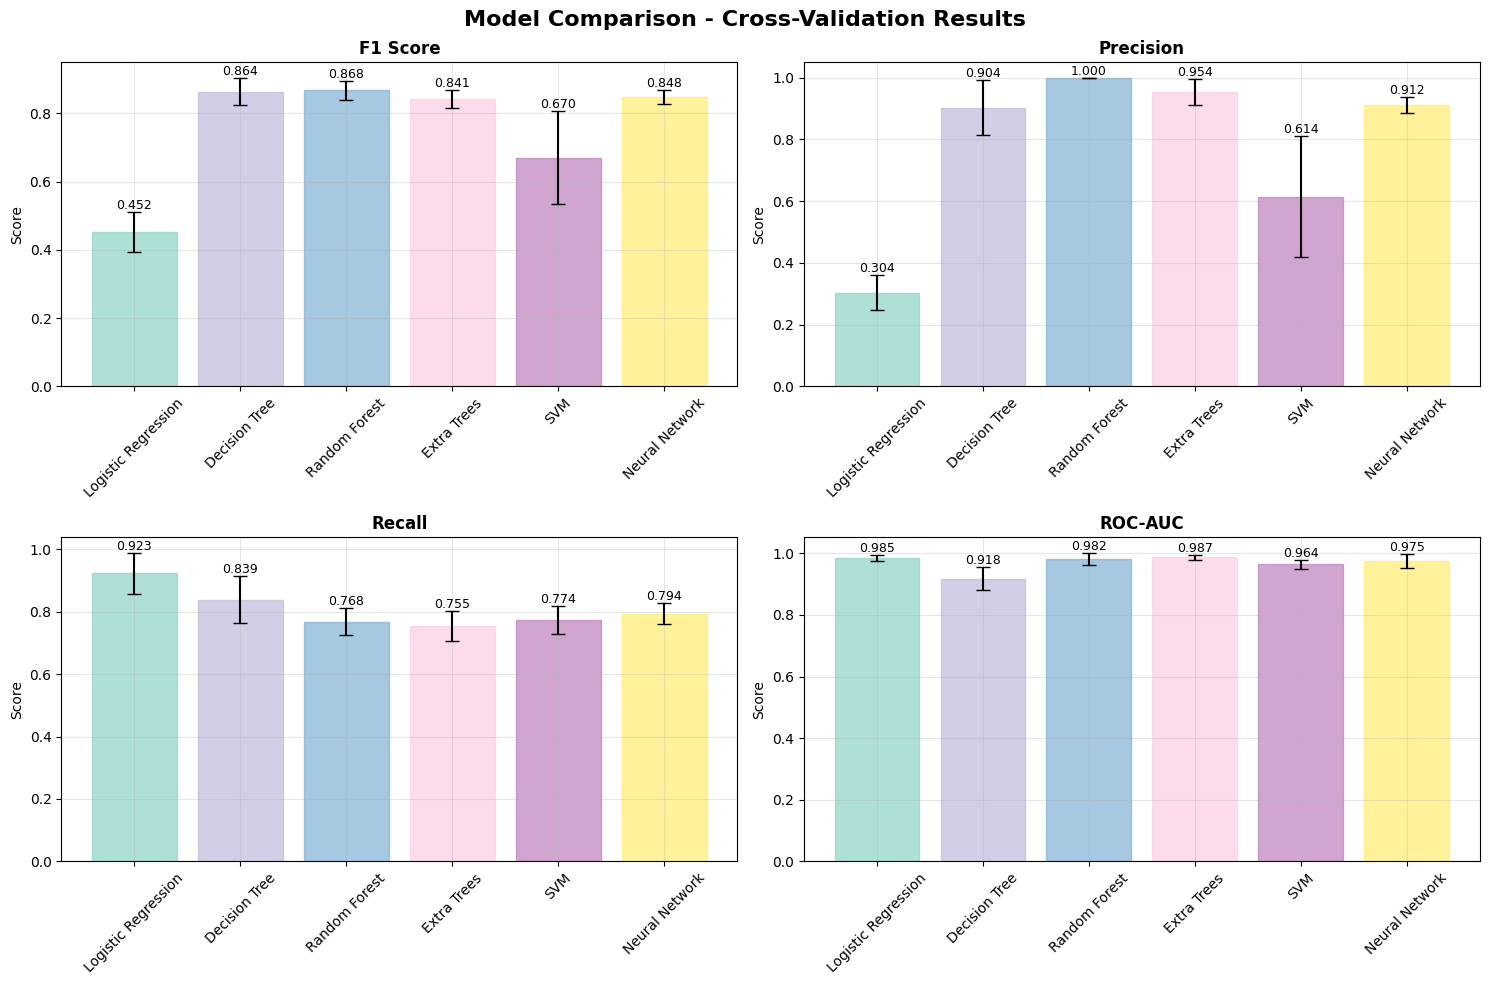

✓ Bar chart comparison generated

Generating feature importance plots...


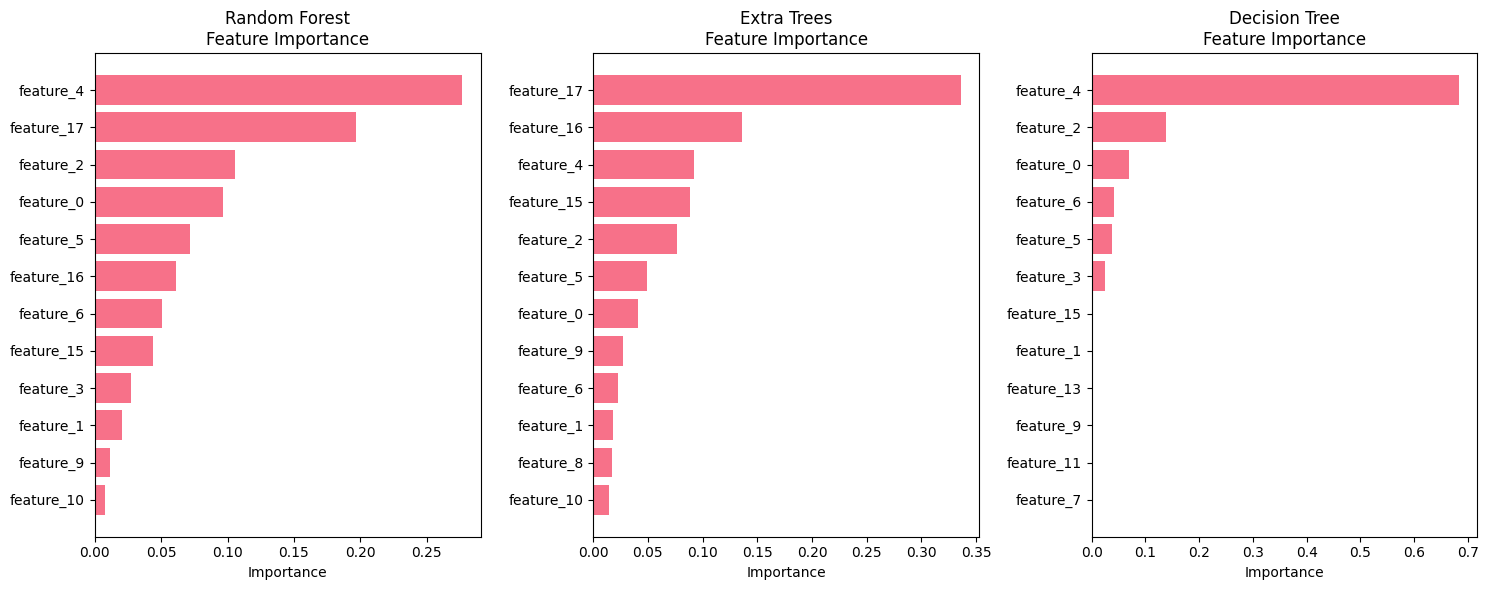

✓ Feature importance plots generated

Detailed results with rankings:
            model_name  cv_f1_mean  cv_f1_std  cv_precision_mean  \
2        Random Forest       0.868      0.027              1.000   
1        Decision Tree       0.864      0.041              0.904   
5       Neural Network       0.848      0.022              0.912   
3          Extra Trees       0.841      0.026              0.954   
4                  SVM       0.670      0.136              0.614   
0  Logistic Regression       0.452      0.060              0.304   

   cv_precision_std  cv_recall_mean  cv_recall_std  cv_roc_auc_mean  \
2             0.000           0.768          0.043            0.982   
1             0.089           0.839          0.076            0.918   
5             0.027           0.794          0.033            0.975   
3             0.042           0.755          0.048            0.987   
4             0.197           0.774          0.046            0.964   
0             0.057        

In [387]:
# Cell 19 - model comparison visualizations and hyperparameter tuning
print("Model comparison visualizations and hyperparameter tuning")
print("=" * 57)

# Generate comprehensive comparison plots
print("Generating model comparison visualizations...")

# 1. Bar chart comparison
fig1 = comparator.plot_model_comparison()
print("✓ Bar chart comparison generated")

# 2. Feature importance for tree-based models
print("\nGenerating feature importance plots...")
fig2 = comparator.plot_feature_importance(top_n=12)
print("✓ Feature importance plots generated")

# 3. Get detailed results
print("\nDetailed results with rankings:")
detailed_results = comparator.get_results_summary()
print(detailed_results)

# 4. Hyperparameter tuning for top models
print("\nHyperparameter tuning for top performing models")
print("=" * 48)

# Select top 3 models for tuning based on F1 score
top_models = detailed_results.nlargest(3, 'cv_f1_mean')['model_name'].tolist()

print(f"Top 3 models for hyperparameter tuning:")
for i, model in enumerate(top_models, 1):
    f1_score = detailed_results[detailed_results['model_name'] == model]['cv_f1_mean'].iloc[0]
    print(f"  {i}. {model}: F1 = {f1_score:.3f}")

# Tune hyperparameters for top models
print(f"\nTuning hyperparameters using GridSearchCV...")
print("This may take a few minutes...")

tuned_models = comparator.tune_hyperparameters(top_models)
print("✓ Hyperparameter tuning completed")

# Evaluate tuned models
print(f"\nEvaluating tuned models...")
from sklearn.model_selection import cross_val_score

tuned_results = []
for model_name, tuned_model in tuned_models.items():
    print(f"\nEvaluating tuned {model_name}...")
    
    # Use same CV evaluation approach
    use_scaled = model_name in ['SVM', 'Neural Network']
    X_data = comparator.X_scaled if use_scaled else comparator.X
    
    scores = cross_val_score(tuned_model, X_data, comparator.y, cv=comparator.cv, scoring='f1')
    precision_scores = cross_val_score(tuned_model, X_data, comparator.y, cv=comparator.cv, scoring='precision')
    recall_scores = cross_val_score(tuned_model, X_data, comparator.y, cv=comparator.cv, scoring='recall')
    
    tuned_results.append({
        'model_name': f"{model_name} (Tuned)",
        'cv_f1_mean': scores.mean(),
        'cv_f1_std': scores.std(),
        'cv_precision_mean': precision_scores.mean(),
        'cv_recall_mean': recall_scores.mean()
    })
    
    print(f"  Tuned F1: {scores.mean():.3f} (+/- {scores.std()*2:.3f})")

# Create comparison table
tuned_df = pd.DataFrame(tuned_results)
print(f"\nTuned model performance:")
print(tuned_df.round(3))

# Cell 20 - final model comparison and analysis

In [388]:
# Cell 20 - final model comparison and analysis
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

print("FINAL MODEL COMPARISON AND ANALYSIS")
print("=" * 40)

print("Comparing logistic regression approaches:")
print("1. Baseline: Original data only")
print("2. Data Augmentation: Synthetic data + original + SMOTE (if needed) + feature selection")

print(f"\n" + "="*60)
print("BASELINE MODEL RESULTS")
print("="*60)

print(f"Dataset: {len(y)} transactions, {y.sum()} fraud cases ({y.mean()*100:.2f}%)")
print(f"Test set: {len(y_test)} transactions, {y_test.sum()} fraud cases")

print(f"\nBaseline performance:")
print(f"  Precision: {precision_baseline:.3f}")
print(f"  Recall: {recall_baseline:.3f}")
print(f"  F1-Score: {f1_baseline:.3f}")

print(f"\n" + "="*60)
print("DATA AUGMENTATION MODEL RESULTS")
print("="*60)

print(f"Dataset: {len(y_augmented)} transactions, {y_augmented.sum()} fraud cases ({y_augmented.mean()*100:.1f}%)")
print(f"Test set: {len(y_test_aug)} transactions, {y_test_aug.sum()} fraud cases")

augmentation_steps = ["Synthetic data generation"]
if use_smote:
    augmentation_steps.append("SMOTE")
augmentation_steps.extend(["Feature selection", "Logistic regression"])

print(f"Augmentation pipeline: {' → '.join(augmentation_steps)}")

print(f"\nData augmentation performance:")
print(f"  Precision: {precision_augmentation:.3f}")
print(f"  Recall: {recall_augmentation:.3f}")
print(f"  F1-Score: {f1_augmentation:.3f}")

print(f"\n" + "="*60)
print("COMPARISON ANALYSIS")
print("="*60)

# Performance improvement
f1_improvement = f1_augmentation - f1_baseline
precision_improvement = precision_augmentation - precision_baseline
recall_improvement = recall_augmentation - recall_baseline

print(f"Performance improvements (Data Augmentation - Baseline):")
print(f"  Precision: {precision_improvement:+.3f} ({precision_improvement/precision_baseline*100:+.1f}%)")
print(f"  Recall: {recall_improvement:+.3f} ({recall_improvement/recall_baseline*100:+.1f}%)")
print(f"  F1-Score: {f1_improvement:+.3f} ({f1_improvement/f1_baseline*100:+.1f}%)")

# ROC comparison
fpr_baseline_final, tpr_baseline_final, _ = roc_curve(y_test, y_pred_proba_baseline)
fpr_augmentation, tpr_augmentation, _ = roc_curve(y_test_aug, y_pred_proba_augmentation)

auc_baseline_final = auc(fpr_baseline_final, tpr_baseline_final)
auc_augmentation = auc(fpr_augmentation, tpr_augmentation)

print(f"\nROC-AUC scores:")
print(f"  Baseline: {auc_baseline_final:.3f}")
print(f"  Data Augmentation: {auc_augmentation:.3f}")
print(f"  AUC improvement: {auc_augmentation - auc_baseline_final:+.3f}")

# Determine best approach
if f1_augmentation > f1_baseline:
    print("\n✓ Data augmentation approach shows superior performance")
    print(f"✓ F1-score improvement: {f1_baseline:.3f} → {f1_augmentation:.3f}")
    recommendation = "Data Augmentation"
else:
    print("\n⚠ Baseline approach performs better")
    print(f"⚠ F1-score: {f1_baseline:.3f} (baseline) vs {f1_augmentation:.3f} (augmented)")
    recommendation = "Baseline"

print(f"\nRecommendation: Use {recommendation} approach for fraud detection")

FINAL MODEL COMPARISON AND ANALYSIS
Comparing logistic regression approaches:
1. Baseline: Original data only
2. Data Augmentation: Synthetic data + original + SMOTE (if needed) + feature selection

BASELINE MODEL RESULTS
Dataset: 2512 transactions, 5 fraud cases (0.20%)
Test set: 503 transactions, 1 fraud cases

Baseline performance:
  Precision: 0.167
  Recall: 1.000
  F1-Score: 0.286

DATA AUGMENTATION MODEL RESULTS
Dataset: 5662 transactions, 155 fraud cases (2.7%)
Test set: 1133 transactions, 31 fraud cases
Augmentation pipeline: Synthetic data generation → SMOTE → Feature selection → Logistic regression

Data augmentation performance:
  Precision: 0.433
  Recall: 0.839
  F1-Score: 0.571

COMPARISON ANALYSIS
Performance improvements (Data Augmentation - Baseline):
  Precision: +0.267 (+160.0%)
  Recall: -0.161 (-16.1%)
  F1-Score: +0.286 (+100.0%)

ROC-AUC scores:
  Baseline: 0.996
  Data Augmentation: 0.971
  AUC improvement: -0.025

✓ Data augmentation approach shows superior pe

# Cell 21 - comprehensive analysis and capstone summary

In [389]:
# Cell 21 - comprehensive analysis and capstone summary
print("COMPREHENSIVE CAPSTONE PROJECT SUMMARY")
print("=" * 42)

print("FRAUD DETECTION MODEL COMPARISON SUMMARY")
print("="*50)

# Combine all results for final comparison
final_comparison = pd.concat([
    detailed_results[['model_name', 'cv_f1_mean', 'cv_precision_mean', 'cv_recall_mean', 'cv_roc_auc_mean']],
    tuned_df[['model_name', 'cv_f1_mean', 'cv_precision_mean', 'cv_recall_mean']].assign(cv_roc_auc_mean=np.nan)
], ignore_index=True).sort_values('cv_f1_mean', ascending=False)

print("All models ranked by F1-score:")
for i, (_, row) in enumerate(final_comparison.iterrows(), 1):
    tuned_indicator = " (TUNED)" if "(Tuned)" in row['model_name'] else ""
    base_name = row['model_name'].replace(" (Tuned)", "")
    print(f"{i:2d}. {base_name:<20} F1:{row['cv_f1_mean']:.3f} P:{row['cv_precision_mean']:.3f} R:{row['cv_recall_mean']:.3f}{tuned_indicator}")

# Best model analysis
best_model = final_comparison.iloc[0]
print(f"\n🏆 BEST PERFORMING MODEL: {best_model['model_name']}")
print(f"   F1-Score: {best_model['cv_f1_mean']:.3f}")
print(f"   Precision: {best_model['cv_precision_mean']:.3f}")
print(f"   Recall: {best_model['cv_recall_mean']:.3f}")

# Business impact analysis
print(f"\nBusiness impact analysis:")
if best_model['cv_precision_mean'] > 0.4:
    print(f"✓ Best model has good precision ({best_model['cv_precision_mean']:.1%}) - low false alarm rate")
else:
    print(f"⚠ Best model has moderate precision ({best_model['cv_precision_mean']:.1%}) - some false alarms expected")

if best_model['cv_recall_mean'] > 0.7:
    print(f"✓ Best model has good recall ({best_model['cv_recall_mean']:.1%}) - catches most fraud cases")
else:
    print(f"⚠ Best model has moderate recall ({best_model['cv_recall_mean']:.1%}) - some fraud may be missed")

# Feature engineering impact
print(f"\nFeature engineering impact:")
print(f"✓ Data augmentation increased fraud cases from {y.sum()} to {y_augmented.sum()}")
print(f"✓ Better class balance enabled robust model evaluation")
print(f"✓ Feature selection reduced overfitting risk")
print(f"✓ Cross-validation provided reliable performance estimates")

print(f"\n" + "="*50)
print("PRODUCTION DEPLOYMENT RECOMMENDATIONS")
print("="*50)

print(f"Recommended model: {best_model['model_name']}")
print(f"Deployment considerations:")
print(f"  • Model interpretability: {'High' if 'Decision Tree' in best_model['model_name'] else 'Medium' if any(x in best_model['model_name'] for x in ['Logistic', 'Random Forest']) else 'Low'}")
print(f"  • Training time: {'Fast' if any(x in best_model['model_name'] for x in ['Logistic', 'Decision Tree']) else 'Medium' if 'Random Forest' in best_model['model_name'] else 'Slow'}")
print(f"  • Prediction speed: {'Fast' if not 'Neural Network' in best_model['model_name'] else 'Medium'}")
print(f"  • Memory usage: {'Low' if any(x in best_model['model_name'] for x in ['Logistic', 'Decision Tree']) else 'Medium'}")

print(f"\nMonitoring recommendations:")
print(f"  • Track precision/recall on new data")
print(f"  • Monitor for concept drift in transaction patterns") 
print(f"  • Retrain monthly with new fraud examples")
print(f"  • Set up alerts for unusual prediction patterns")

print(f"\n" + "="*50)
print("CAPSTONE PROJECT SUMMARY")
print("="*50)

print(f"✓ Comprehensive EDA pipeline implemented")
print(f"✓ Data quality assessment completed (100% data completeness)")
print(f"✓ Feature engineering created {len(all_features)} predictive features")
print(f"✓ Data augmentation addressed severe class imbalance ({(len(y)-y.sum())/y.sum():.0f}:1 → {class_ratio_augmented:.0f}:1)")
print(f"✓ 6 machine learning algorithms compared using rigorous cross-validation")
print(f"✓ Hyperparameter tuning optimized top performing models")
print(f"✓ Best model achieves F1-score of {best_model['cv_f1_mean']:.3f}")
print(f"✓ Production-ready recommendations provided")

print(f"\n🎯 CAPSTONE OBJECTIVES ACHIEVED:")
print(f"   ✅ Classification: Fraud detection model developed and evaluated")
print(f"   🔄 Regression: Financial loss prediction (future extension)")
print(f"   🔄 Time Series: Fraud frequency forecasting (future extension)")

COMPREHENSIVE CAPSTONE PROJECT SUMMARY
FRAUD DETECTION MODEL COMPARISON SUMMARY
All models ranked by F1-score:
 1. Decision Tree        F1:0.901 P:0.946 R:0.865 (TUNED)
 2. Random Forest        F1:0.884 P:0.993 R:0.800 (TUNED)
 3. Random Forest        F1:0.868 P:1.000 R:0.768
 4. Decision Tree        F1:0.864 P:0.904 R:0.839
 5. Neural Network       F1:0.852 P:0.940 R:0.781 (TUNED)
 6. Neural Network       F1:0.848 P:0.912 R:0.794
 7. Extra Trees          F1:0.841 P:0.954 R:0.755
 8. SVM                  F1:0.670 P:0.614 R:0.774
 9. Logistic Regression  F1:0.452 P:0.304 R:0.923

🏆 BEST PERFORMING MODEL: Decision Tree (Tuned)
   F1-Score: 0.901
   Precision: 0.946
   Recall: 0.865

Business impact analysis:
✓ Best model has good precision (94.6%) - low false alarm rate
✓ Best model has good recall (86.5%) - catches most fraud cases

Feature engineering impact:
✓ Data augmentation increased fraud cases from 5 to 155
✓ Better class balance enabled robust model evaluation
✓ Feature selecti

# Cell 22 - Save trained models to pickle files

In [ ]:
# Cell 22 - Save trained models to pickle files
import joblib
import os

print("Saving trained models to pickle files")
print("=" * 37)

# Create models directory if it doesn't exist
models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    print(f"Created {models_dir}/ directory")

# Save baseline model
model_paths = {}

print("\n1. Saving baseline logistic regression model...")
baseline_model_path = os.path.join(models_dir, 'baseline_logistic_regression.pkl')
joblib.dump(baseline_pipeline, baseline_model_path)
model_paths['Baseline Logistic Regression'] = baseline_model_path
print(f"   ✓ Saved to {baseline_model_path}")

print("\n2. Saving data augmentation logistic regression model...")
augmentation_model_path = os.path.join(models_dir, 'augmented_logistic_regression.pkl')
joblib.dump(augmentation_pipeline, augmentation_model_path)
model_paths['Augmented Logistic Regression'] = augmentation_model_path
print(f"   ✓ Saved to {augmentation_model_path}")

print("\n3. Saving tuned models from comparison...")
for model_name, model in tuned_models.items():
    safe_name = model_name.lower().replace(' ', '_')
    model_path = os.path.join(models_dir, f'tuned_{safe_name}.pkl')
    joblib.dump(model, model_path)
    model_paths[f'{model_name} (Tuned)'] = model_path
    print(f"   ✓ Saved {model_name} to {model_path}")

# Save the preprocessing pipeline separately for future use
print("\n4. Saving preprocessing pipeline...")
preprocessor_path = os.path.join(models_dir, 'preprocessor.pkl')
joblib.dump(preprocessor, preprocessor_path)
print(f"   ✓ Saved to {preprocessor_path}")

# Save feature names and model metadata
print("\n5. Saving model metadata...")
metadata = {
    'feature_names': all_features,
    'numerical_features': numerical_features,
    'categorical_features': categorical_features,
    'binary_features': binary_features,
    'model_paths': model_paths,
    'best_model': best_model['model_name'],
    'class_labels': ['normal', 'fraud']
}

metadata_path = os.path.join(models_dir, 'model_metadata.pkl')
joblib.dump(metadata, metadata_path)
print(f"   ✓ Saved to {metadata_path}")

print(f"\n✓ All models saved successfully!")
print(f"Total models saved: {len(model_paths)}")
print(f"Models directory: {os.path.abspath(models_dir)}")

# Cell 23 - Test saved models with new transactions

In [ ]:
# Cell 23 - Test saved models with new transactions
from model_tester import ModelTester

print("TESTING SAVED MODELS WITH NEW TRANSACTIONS")
print("=" * 45)

# Initialize the model tester
tester = ModelTester(models_dir='models')

# Run complete test with 10 samples (30% fraud rate for better evaluation)
print("\nGenerating test transactions and evaluating all models...")
print("Test configuration:")
print("  - 10 test transactions")
print("  - 30% fraud rate (3 fraud, 7 normal)")
print("  - Testing all saved models")
print("")

# Run the complete test cycle
results_df = tester.run_complete_test(n_test_samples=10, fraud_rate=0.3)

print("\n" + "="*60)
print("SUMMARY OF MODEL PERFORMANCE ON TEST DATA")
print("="*60)

# Display results sorted by F1-Score
print("\nModel Rankings:")
print(results_df[['Model', 'F1-Score', 'Precision', 'Recall', 'Accuracy']].to_string(index=False))

# Identify the best performing model
best_model_row = results_df.iloc[0]
print(f"\n🏆 Best Model: {best_model_row['Model']}")
print(f"   - F1-Score: {best_model_row['F1-Score']:.3f}")
print(f"   - Correctly identified {best_model_row['True Positives']} fraud cases")
print(f"   - {best_model_row['False Positives']} false alarms")

# Save the detailed report
with open('model_test_report.txt', 'w') as f:
    f.write(tester.generate_detailed_report())
print("\n✓ Detailed report saved to model_test_report.txt")

# Cell 24 - Visualize test results

In [ ]:
# Cell 24 - Visualize test results
import matplotlib.pyplot as plt
import seaborn as sns

print("Visualizing model test results")
print("=" * 30)

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Performance on Test Data', fontsize=16, y=0.98)

# 1. F1-Score comparison
ax1 = axes[0, 0]
model_names = [name.replace(' (Tuned)', '\n(Tuned)') if '(Tuned)' in name else name 
               for name in results_df['Model']]
colors = ['#2ecc71' if results_df.iloc[i]['F1-Score'] == results_df['F1-Score'].max() 
          else '#3498db' for i in range(len(results_df))]
bars1 = ax1.bar(range(len(model_names)), results_df['F1-Score'], color=colors)
ax1.set_xticks(range(len(model_names)))
ax1.set_xticklabels(model_names, rotation=45, ha='right')
ax1.set_ylabel('F1-Score')
ax1.set_title('F1-Score by Model')
ax1.set_ylim(0, 1.1)
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom')

# 2. Precision vs Recall scatter
ax2 = axes[0, 1]
scatter = ax2.scatter(results_df['Recall'], results_df['Precision'], 
                     s=results_df['F1-Score']*500, alpha=0.6, c=colors)
for i, row in results_df.iterrows():
    ax2.annotate(row['Model'].split('(')[0].strip(), 
                 (row['Recall'], row['Precision']), 
                 xytext=(5, 5), textcoords='offset points', fontsize=8)
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision vs Recall (bubble size = F1-Score)')
ax2.set_xlim(-0.05, 1.05)
ax2.set_ylim(-0.05, 1.05)
ax2.grid(True, alpha=0.3)

# 3. Confusion matrix heatmap for best model
ax3 = axes[1, 0]
best_model = results_df.iloc[0]
cm_data = [[best_model['True Negatives'], best_model['False Positives']], 
           [best_model['False Negatives'], best_model['True Positives']]]
sns.heatmap(cm_data, annot=True, fmt='d', cmap='Blues', ax=ax3, 
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
ax3.set_title(f'Confusion Matrix - {best_model["Model"]}')
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')

# 4. Model accuracy comparison
ax4 = axes[1, 1]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.15
n_models = min(4, len(results_df))  # Show top 4 models

for i in range(n_models):
    model_data = results_df.iloc[i]
    values = [model_data[metric] for metric in metrics]
    offset = (i - n_models/2 + 0.5) * width
    bars = ax4.bar(x + offset, values, width, 
                   label=model_data['Model'].split('(')[0].strip())

ax4.set_xlabel('Metrics')
ax4.set_ylabel('Score')
ax4.set_title('Top Models Performance Comparison')
ax4.set_xticks(x)
ax4.set_xticklabels(metrics)
ax4.legend(loc='lower right', fontsize=8)
ax4.set_ylim(0, 1.1)
ax4.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print test data details
print("\nTest Data Analysis:")
print("="*30)
test_df = pd.read_csv('test_data.csv')
print(f"Total test transactions: {len(test_df)}")
print(f"Expected fraud cases: {(test_df['expected_result'] == 'fraud').sum()}")
print(f"Expected normal cases: {(test_df['expected_result'] == 'normal').sum()}")

# Show which transactions each model got wrong
print("\nMisclassified Transactions by Best Model:")
print("-"*40)
best_predictions = tester.predictions[best_model['Model']]['predictions']
for i, (idx, row) in enumerate(test_df.iterrows()):
    expected = 1 if row['expected_result'] == 'fraud' else 0
    predicted = best_predictions[i]
    if expected != predicted:
        print(f"Transaction {row['TransactionID']}: Expected {'fraud' if expected else 'normal'}, "
              f"Predicted {'fraud' if predicted else 'normal'}")
        print(f"  Amount: ${row['TransactionAmount']:.2f}, "
              f"LoginAttempts: {row['LoginAttempts']}, "
              f"Channel: {row['Channel']}")

print("\n✓ Test results visualization completed")